In [3]:

# Math
import numpy as np
from scipy.fftpack import fft
# Visualization
import matplotlib.pyplot as plt
from scipy import signal
import IPython.display as ipd
import librosa.display
import plotly.offline as py
py.init_notebook_mode(connected=True)
from visualization import Visualization
 
%matplotlib inline

<script>requirejs.config({paths: { 'plotly': ['https://cdn.plot.ly/plotly-latest.min']},});if(!window.Plotly) {{require(['plotly'],function(plotly) {window.Plotly=plotly;});}}</script>

In [4]:
train_audio_path='./input/train/audio'
filename='/dog/0a7c2a8d_nohash_0.wav'
dog_sounds=Visualization(str(train_audio_path+filename))
rate,data=dog_sounds.readWAVToRate()

Text(0.5,0,'Seconds')

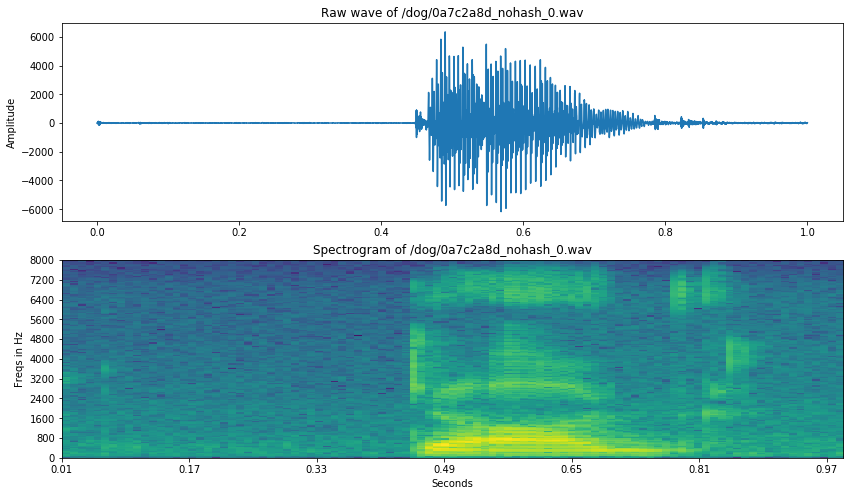

In [5]:
freqs, times, spectrogram = dog_sounds.log_specgram(data,rate)


fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, rate/len(data), rate), data)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower',
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

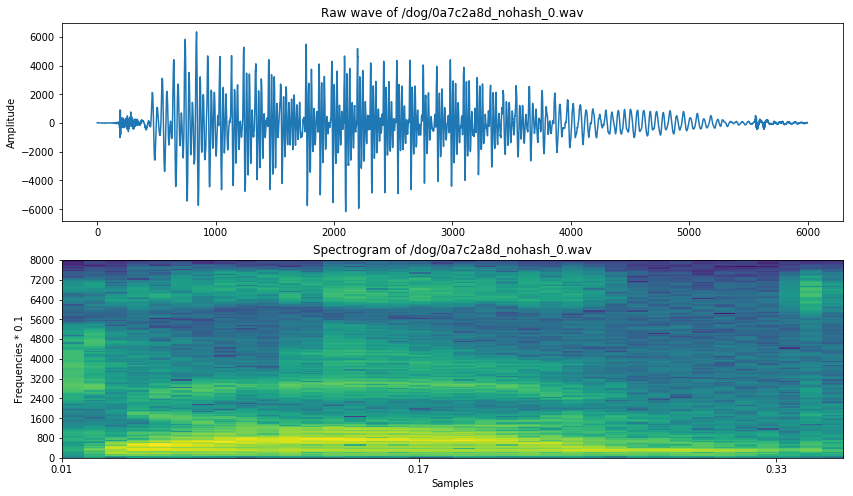

In [6]:
cut_data = data[7000:13000]
ipd.Audio(cut_data, rate=rate)

freqs, times, spectrogram_cut = dog_sounds.log_specgram(cut_data,rate)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
ax1.plot(cut_data)

ax2 = fig.add_subplot(212)
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Frequencies * 0.1')
ax2.set_xlabel('Samples')
ax2.imshow(spectrogram_cut.T, aspect='auto', origin='lower',
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])

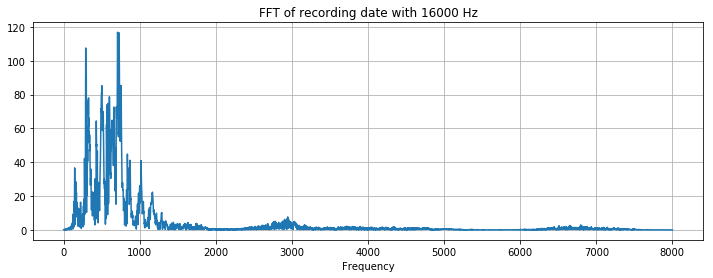

In [7]:
xf, vals = dog_sounds.custom_fft(data,fs=rate)
plt.figure(figsize=(12, 4))
plt.title('FFT of recording date with ' + str(rate) + ' Hz')
plt.plot(xf, vals)
plt.xlabel('Frequency')
plt.grid()
plt.show()

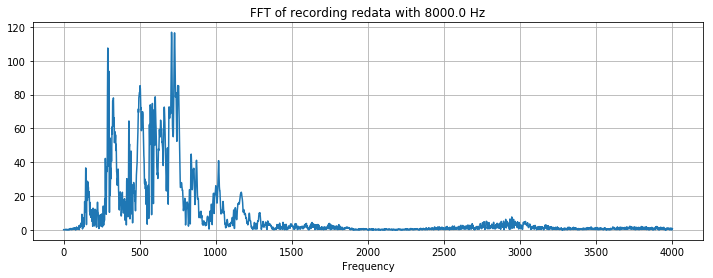

In [9]:
new_rate=8000.0
redata= signal.resample(data, int(new_rate/rate * data.shape[0]))

xf, vals = dog_sounds.custom_fft(redata, new_rate)
plt.figure(figsize=(12, 4))
plt.title('FFT of recording redata with ' + str(new_rate) + ' Hz')
plt.plot(xf, vals)
plt.xlabel('Frequency')
plt.grid()
plt.show()